# Standard Scaling

# 1. Standard Scaling
`Standard scaling` is a method of scaling the data such that the distribution of the data is centered around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithms.

The formula is as follows:

z = (x-mU) / std


In [8]:
data = {
    'age':[20, 21, 22, 23, 25],
    'height':[180, 181, 182, 183, 185],
    'weight':[70, 71, 72, 73, 75]
}



In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler , MinMaxScaler, MaxAbsScaler, RobustScaler

In [14]:

df = pd.DataFrame(data)

In [15]:
# Standard scaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)
print(df_scaled)

df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
print(df_scaled)

[[-1.27872403 -1.27872403 -1.27872403]
 [-0.69748583 -0.69748583 -0.69748583]
 [-0.11624764 -0.11624764 -0.11624764]
 [ 0.46499055  0.46499055  0.46499055]
 [ 1.62746694  1.62746694  1.62746694]]
        age    height    weight
0 -1.278724 -1.278724 -1.278724
1 -0.697486 -0.697486 -0.697486
2 -0.116248 -0.116248 -0.116248
3  0.464991  0.464991  0.464991
4  1.627467  1.627467  1.627467


In [16]:
# Min-Max Scaler

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df)
print(df_scaled)

df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()


[[0.  0.  0. ]
 [0.2 0.2 0.2]
 [0.4 0.4 0.4]
 [0.6 0.6 0.6]
 [1.  1.  1. ]]


,age,height,weight
0,0.0,0.0,0.0
1,0.2,0.2,0.2
2,0.4,0.4,0.4
3,0.6,0.6,0.6
4,1.0,1.0,1.0


In [17]:
# Max Abs Scaler
scaler = MaxAbsScaler()

df_scaled = scaler.fit_transform(df)
print(df_scaled)

df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

[[0.8        0.97297297 0.93333333]
 [0.84       0.97837838 0.94666667]
 [0.88       0.98378378 0.96      ]
 [0.92       0.98918919 0.97333333]
 [1.         1.         1.        ]]


,age,height,weight
0,0.80,0.972973,0.933333
1,0.84,0.978378,0.946667
2,0.88,0.983784,0.960000
3,0.92,0.989189,0.973333
4,1.00,1.000000,1.000000


In [18]:
# Robust Scaler
scaler = RobustScaler()

df_scaled = scaler.fit_transform(df)
print(df_scaled)

df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

[[-1.  -1.  -1. ]
 [-0.5 -0.5 -0.5]
 [ 0.   0.   0. ]
 [ 0.5  0.5  0.5]
 [ 1.5  1.5  1.5]]


,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.5,1.5,1.5


--- 
# Transformation


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# generate not-normalized data (exponential distribution)
np.random.seed(0)
data = np.random.exponential(size=1000,scale=2)
df = pd.DataFrame(data,columns=['Numbers'])
print(df.min())
df.head()

Numbers    0.001092
dtype: float64


,Numbers
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: ylabel='Count'>

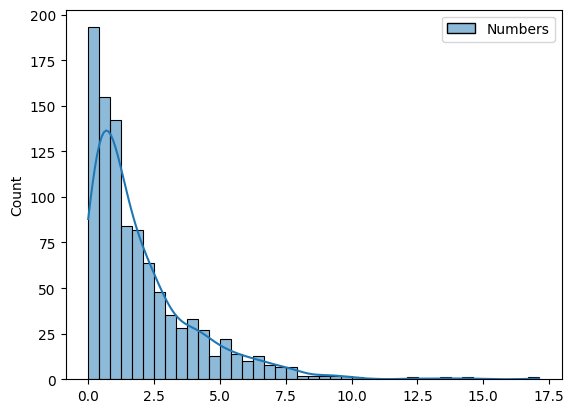

In [23]:
sns.histplot(df,kde=True)

In [32]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

# data must be positive for box-cox
pt_box_cox = PowerTransformer(method='box-cox',standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson')
pt_quantile = QuantileTransformer(output_distribution='normal')


df["box_cox"] = pt_box_cox.fit_transform(df[['Numbers']] + 1)
df["yeo_johnson"] = pt_yeo_johnson.fit_transform(df[['Numbers']])
df["quantile"] = pt_quantile.fit_transform(df[['Numbers']])

df.head()




,Numbers,box_cox,yeo_johnson,quantile
0,1.591749,0.787485,0.179335,0.162552
1,2.511862,0.980233,0.677331,0.587964
2,1.846446,0.849553,0.339698,0.286135
3,1.574402,0.782945,0.167607,0.157469
4,1.102097,0.639848,-0.202107,-0.154930


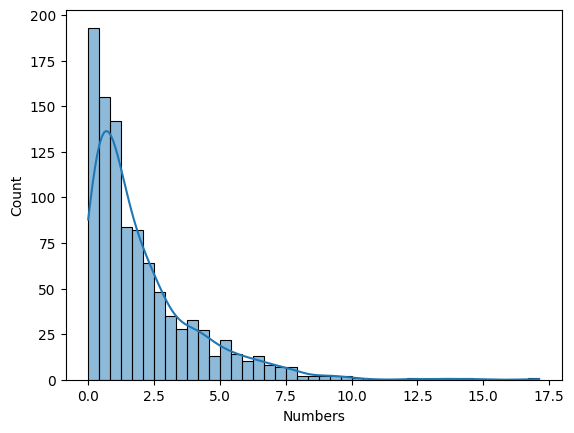

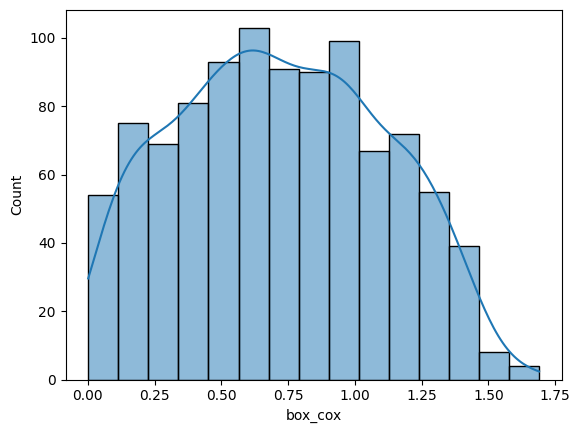

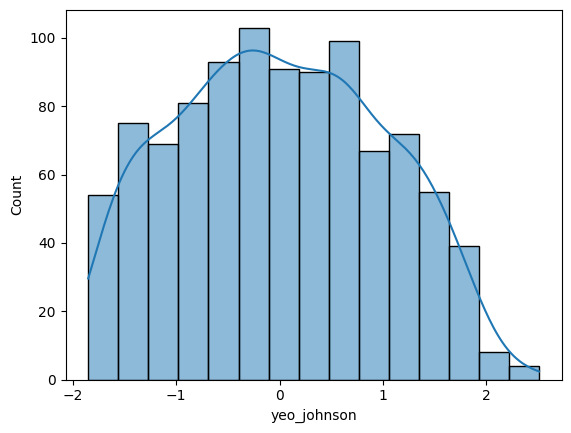

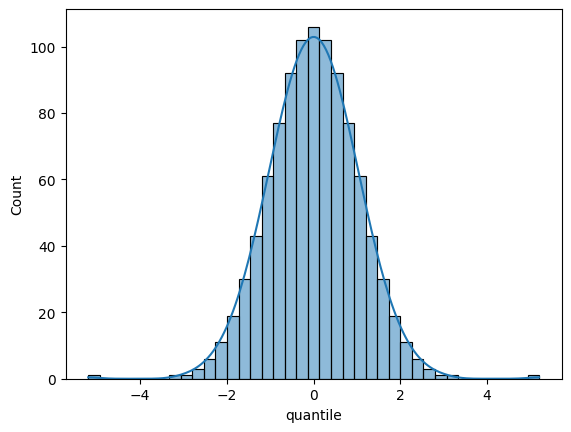

In [33]:
for i in df.columns:
    sns.histplot(df[i],kde=True)
    plt.show()

---
# Normalization

# L2 Normallzatlon.
Rescales each sample (row) to have unit norm. This type of normalization is often used
when dealing with text data. The L2 norm is calculated as the square root of the sum of
the squared vector values.

In [35]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1],[1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


# L1 Normalization:
Also rescales each sample (row) but with a different approach, ensuring the sum of the
absolute values is 1 in each row. The L1 norm is calculated as the sum of the absolute
vector values. Example:

In [36]:
from sklearn.preprocessing import Normalizer
data = [[1,1,1],[1,1,0],[1,0,0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log Transformation

In [38]:
import pandas as pd
import numpy as np

data = {
    'values' : [10,20,30,40,50,100,200,500,1000,2000,5000,10000]
}

df = pd.DataFrame(data)
df['log'] = np.log(df['values'])
df.head()


,values,log
0,10,2.302585
1,20,2.995732
2,30,3.401197
3,40,3.688879
4,50,3.912023


<Axes: xlabel='values', ylabel='Count'>

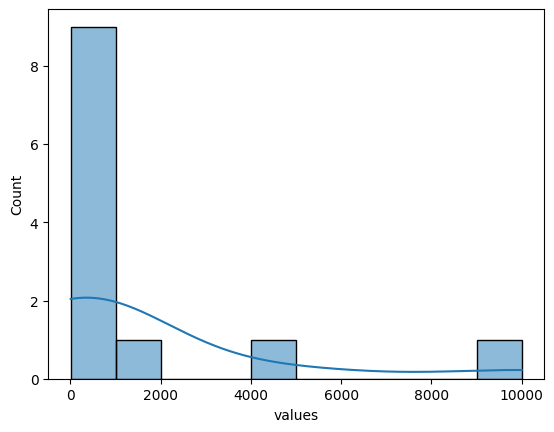

In [39]:
import seaborn as sns

sns.histplot(df['values'],kde=True)

<Axes: xlabel='log', ylabel='Count'>

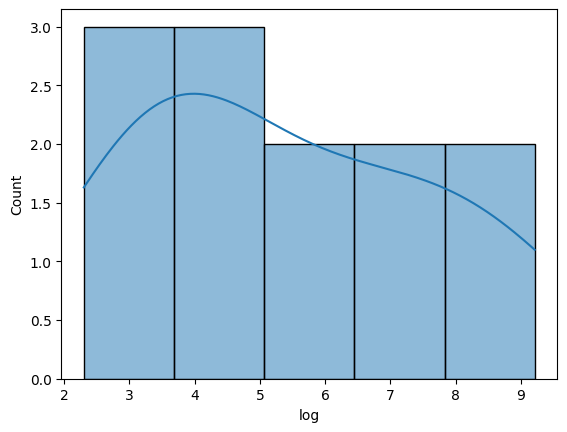

In [41]:
sns.histplot(df['log'],kde=True)